In [36]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [37]:
cv2.__version__

'3.4.3'

In [38]:
img = cv2.imread('Rahul.jpg')


In [39]:
img.shape

(1600, 1200, 3)

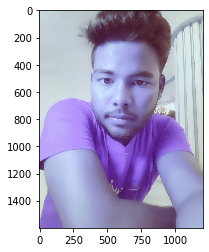

In [40]:
plt.imshow(img)

In [41]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [42]:
gray.shape

(1600, 1200)

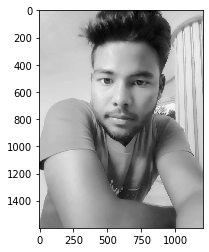

In [43]:
plt.imshow(gray,cmap='gray')

In [44]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

In [45]:
faces = face_cascade.detectMultiScale(img, 1.3, 5)
faces

array([[287, 255, 665, 665]], dtype=int32)

In [46]:
(x,y,w,h) = faces[0]

In [47]:
x,y,w,h

(287, 255, 665, 665)

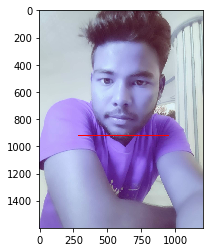

In [48]:

face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

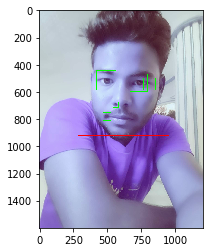

In [49]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

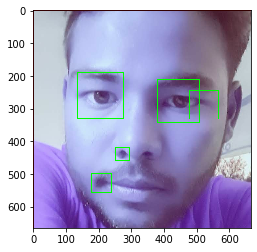

In [50]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [51]:
def get_cropped_images_if_two_eyes(img_path):
  img = cv2.imread(img_path)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  faces = face_cascade.detectMultiScale(gray,1.3,5)
  for (x,y,w,h) in faces:
    roi_gray = gray[y:y+h,x:x+w]
    roi_color = img[y:y+h,x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    if len(eyes) >=2:
      return roi_color

In [52]:
original_image = cv2.imread('C:\Users\rahul\Test_data.jpg')
plt.imshow(original_image)

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (<ipython-input-52-5f62d994e86c>, line 1)

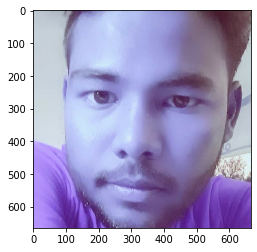

In [53]:
cropped_img = get_cropped_images_if_two_eyes('Rahul.jpg')
plt.imshow(cropped_img)


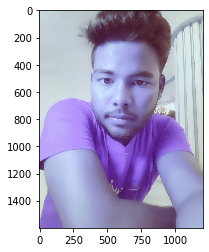

In [54]:
original_image = cv2.imread('Rahul.jpg')
plt.imshow(original_image)

In [55]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [56]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
  if entry.is_dir():
    img_dirs.append(entry.path)




In [57]:
img_dirs

['./dataset/Anand Bharti',
 './dataset/Rahul kr. Paswan',
 './dataset/Rohit Dev thakur',
 './dataset/Sadab',
 './dataset/Vikash Shukla']

In [58]:
import shutil
if os.path.exists(path_to_cr_data):
  shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)




In [59]:
cropped_img_dirs = []
friends_file_name_dict = {}

for img_dir in img_dirs:
  count = 1
  friends_name = img_dir.split('/')[-1]
  print(friends_name)

  friends_file_name_dict[friends_name] = []

  for entry in os.scandir(img_dir):
    roi_color = get_cropped_images_if_two_eyes(entry.path)
    if roi_color is not None:
      cropped_folder = path_to_cr_data + friends_name
      if not os.path.exists(cropped_folder):
        os.makedirs(cropped_folder)
        cropped_img_dirs.append(cropped_folder)
        print('generating the cropped images in folder: ',cropped_folder)

      cropped_file_name = friends_name + str (count) + '.png'
      cropped_file_path = cropped_folder + "/" + cropped_file_name

      cv2.imwrite(cropped_file_path, roi_color)
      friends_file_name_dict[friends_name].append(cropped_file_path)
      count += 1

Anand Bharti
generating the cropped images in folder:  ./dataset/cropped/Anand Bharti
Rahul kr. Paswan
generating the cropped images in folder:  ./dataset/cropped/Rahul kr. Paswan
Rohit Dev thakur
generating the cropped images in folder:  ./dataset/cropped/Rohit Dev thakur
Sadab
generating the cropped images in folder:  ./dataset/cropped/Sadab
Vikash Shukla
generating the cropped images in folder:  ./dataset/cropped/Vikash Shukla


In [60]:
friends_file_name_dict

{'Anand Bharti': ['./dataset/cropped/Anand Bharti/Anand Bharti1.png',
  './dataset/cropped/Anand Bharti/Anand Bharti2.png',
  './dataset/cropped/Anand Bharti/Anand Bharti3.png',
  './dataset/cropped/Anand Bharti/Anand Bharti4.png',
  './dataset/cropped/Anand Bharti/Anand Bharti5.png',
  './dataset/cropped/Anand Bharti/Anand Bharti6.png',
  './dataset/cropped/Anand Bharti/Anand Bharti7.png',
  './dataset/cropped/Anand Bharti/Anand Bharti8.png',
  './dataset/cropped/Anand Bharti/Anand Bharti9.png',
  './dataset/cropped/Anand Bharti/Anand Bharti10.png',
  './dataset/cropped/Anand Bharti/Anand Bharti11.png',
  './dataset/cropped/Anand Bharti/Anand Bharti12.png',
  './dataset/cropped/Anand Bharti/Anand Bharti13.png',
  './dataset/cropped/Anand Bharti/Anand Bharti14.png',
  './dataset/cropped/Anand Bharti/Anand Bharti15.png',
  './dataset/cropped/Anand Bharti/Anand Bharti16.png',
  './dataset/cropped/Anand Bharti/Anand Bharti17.png',
  './dataset/cropped/Anand Bharti/Anand Bharti18.png',
  '

In [61]:
class_dict = {}
count = 0
for friends_name in friends_file_name_dict.keys():
    class_dict[friends_name] = count
    count = count + 1
class_dict

{'Anand Bharti': 0,
 'Rahul kr. Paswan': 1,
 'Rohit Dev thakur': 2,
 'Sadab': 3,
 'Vikash Shukla': 4}

In [62]:
import numpy as np
import pywt
import cv2

In [63]:
def w2d(img,mode='haar',level=1):
  imArray = img
  # Datattype conversion
  #converting to grayscale image
  imArray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
  # Converting to the float values
  imArray = np.float32(imArray)
  imArray /= 255;
  # compute coefficient
  coeffs = pywt.wavedec2(imArray,mode,level=level)
  # Process coefficient
  coeffs_H = list(coeffs)
  coeffs_H[0] *= 0;

  # Reconstructing
  imArray_H = pywt.waverec2(coeffs_H,mode);
  imArray_H *= 255
  imArray_H = np.uint8(imArray_H) 
  return imArray_H
  


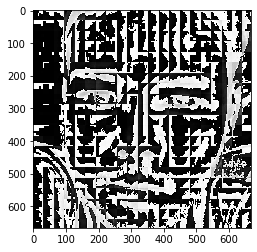

In [64]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har,cmap='gray')

In [65]:
X = []
y = []
for friends_name, training_files in friends_file_name_dict.items():
  for training_image in training_files:
    img = cv2.imread(training_image)
    if img is None:
      continue
    scalled_raw_img = cv2.resize(img,(32,32))
    img_har = w2d(cropped_img,'db1',5)
    scalled_img_har = cv2.resize(img_har,(32,32))
    combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
    X.append(combined_img)
    y.append(class_dict[friends_name])

In [66]:
len(X[0])

4096

In [67]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(264, 4096)

In [68]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [69]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)
pipe = Pipeline([('scaler',StandardScaler()),('svc',SVC(kernel='linear',C=1))])
pipe.fit(X_train,y_train)
pipe.score(X_test,y_test)

0.7878787878787878

In [70]:
print(classification_report(y_test,pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.53      0.73      0.62        11
           1       0.79      0.73      0.76        15
           2       0.75      0.60      0.67        10
           3       1.00      0.91      0.95        22
           4       0.78      0.88      0.82         8

    accuracy                           0.79        66
   macro avg       0.77      0.77      0.76        66
weighted avg       0.81      0.79      0.79        66



In [71]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [72]:

model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [73]:

scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.802692,"{'svc__C': 10, 'svc__kernel': 'rbf'}"
1,random_forest,0.595641,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.782821,{'logisticregression__C': 5}


In [74]:
best_estimators['svm'].score(X_test,y_test)

0.7727272727272727

In [75]:
best_estimators['random_forest'].score(X_test,y_test)

0.5909090909090909

In [76]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.7727272727272727

In [77]:

best_clf = best_estimators['logistic_regression']

In [78]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm


array([[ 8,  3,  0,  0,  0],
       [ 1, 11,  1,  0,  2],
       [ 3,  1,  6,  0,  0],
       [ 1,  0,  1, 18,  2],
       [ 0,  0,  0,  0,  8]], dtype=int64)

Text(69.0, 0.5, 'Truth')

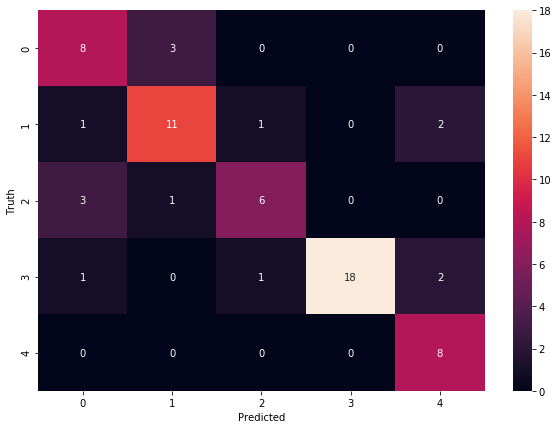

In [79]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [80]:
class_dict


{'Anand Bharti': 0,
 'Rahul kr. Paswan': 1,
 'Rohit Dev thakur': 2,
 'Sadab': 3,
 'Vikash Shukla': 4}